# Model 1 
- batchsize 32, 
- 300 epoch


In [100]:
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

path = r"./input"

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=32, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


Convert from RGB to Lab

In [101]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) 
print(X.shape)
print(Y.shape)

(32, 256, 256, 1)
(32, 256, 256, 2)


In [118]:
#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [119]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_155 (Conv2D)         (None, 128, 128, 64)      640       
                                                                 
 conv2d_156 (Conv2D)         (None, 128, 128, 128)     73856     
                                                                 
 conv2d_157 (Conv2D)         (None, 64, 64, 128)       147584    
                                                                 
 conv2d_158 (Conv2D)         (None, 64, 64, 256)       295168    
                                                                 
 conv2d_159 (Conv2D)         (None, 32, 32, 256)       590080    
                                                                 
 conv2d_160 (Conv2D)         (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_161 (Conv2D)         (None, 32, 32, 512)     

In [121]:
# Create a History callback
history = History()

# Train the model with validation split and history callback
model.fit(X, Y, validation_split=0.2, epochs=150, batch_size=32, callbacks=[history])

Epoch 1/150
1/1 [==============================] - 7s 7s/step - loss: 0.8838 - accuracy: 0.5388 - val_loss: 0.0927 - val_accuracy: 0.3195
Epoch 2/150
1/1 [==============================] - 7s 7s/step - loss: 0.0685 - accuracy: 0.5388 - val_loss: 0.0366 - val_accuracy: 0.3195
Epoch 3/150
1/1 [==============================] - 7s 7s/step - loss: 0.0276 - accuracy: 0.5388 - val_loss: 0.0323 - val_accuracy: 0.3265
Epoch 4/150
1/1 [==============================] - 7s 7s/step - loss: 0.0269 - accuracy: 0.5380 - val_loss: 0.1463 - val_accuracy: 0.3195
Epoch 5/150
1/1 [==============================] - 7s 7s/step - loss: 0.1191 - accuracy: 0.5391 - val_loss: 0.0345 - val_accuracy: 0.6798
Epoch 6/150
1/1 [==============================] - 7s 7s/step - loss: 0.0272 - accuracy: 0.4732 - val_loss: 0.0377 - val_accuracy: 0.4544
Epoch 7/150
1/1 [==============================] - 7s 7s/step - loss: 0.0277 - accuracy: 0.5524 - val_loss: 0.0338 - val_accuracy: 0.3345
Epoch 8/150
1/1 [=================

1/1 [==============================] - 7s 7s/step - loss: 0.0250 - accuracy: 0.5721 - val_loss: 0.0370 - val_accuracy: 0.3473
Epoch 61/150
1/1 [==============================] - 7s 7s/step - loss: 0.0250 - accuracy: 0.5566 - val_loss: 0.0349 - val_accuracy: 0.3484
Epoch 62/150
1/1 [==============================] - 7s 7s/step - loss: 0.0244 - accuracy: 0.5580 - val_loss: 0.0331 - val_accuracy: 0.3581
Epoch 63/150
1/1 [==============================] - 7s 7s/step - loss: 0.0245 - accuracy: 0.5663 - val_loss: 0.0332 - val_accuracy: 0.3612
Epoch 64/150
1/1 [==============================] - 7s 7s/step - loss: 0.0244 - accuracy: 0.5646 - val_loss: 0.0348 - val_accuracy: 0.3492
Epoch 65/150
1/1 [==============================] - 6s 6s/step - loss: 0.0241 - accuracy: 0.5590 - val_loss: 0.0339 - val_accuracy: 0.4360
Epoch 66/150
1/1 [==============================] - 7s 7s/step - loss: 0.0241 - accuracy: 0.5948 - val_loss: 0.0375 - val_accuracy: 0.3643
Epoch 67/150
1/1 [======================

Epoch 119/150
1/1 [==============================] - 4s 4s/step - loss: 0.0221 - accuracy: 0.6754 - val_loss: 0.0310 - val_accuracy: 0.7322
Epoch 120/150
1/1 [==============================] - 4s 4s/step - loss: 0.0216 - accuracy: 0.6901 - val_loss: 0.0326 - val_accuracy: 0.6806
Epoch 121/150
1/1 [==============================] - 5s 5s/step - loss: 0.0213 - accuracy: 0.6929 - val_loss: 0.0341 - val_accuracy: 0.5959
Epoch 122/150
1/1 [==============================] - 4s 4s/step - loss: 0.0214 - accuracy: 0.6804 - val_loss: 0.0326 - val_accuracy: 0.6230
Epoch 123/150
1/1 [==============================] - 5s 5s/step - loss: 0.0209 - accuracy: 0.6943 - val_loss: 0.0296 - val_accuracy: 0.6649
Epoch 124/150
1/1 [==============================] - 5s 5s/step - loss: 0.0204 - accuracy: 0.6943 - val_loss: 0.0286 - val_accuracy: 0.6797
Epoch 125/150
1/1 [==============================] - 5s 5s/step - loss: 0.0204 - accuracy: 0.6862 - val_loss: 0.0330 - val_accuracy: 0.5549
Epoch 126/150
1/1 [=

# Model2

- Train batch 710
- less complex model

In [49]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  )
path = r"./input"
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [7]:
# X =[]
# Y =[]
# for img in train[0]:
#   try:
#       lab = rgb2lab(img)
#       X.append(lab[:,:,0]) 
#       Y.append(lab[:,:,1:] / 128) 
#   except:
#      print('error')
# X = np.array(X)
# Y = np.array(Y)
# X = X.reshape(X.shape+(1,)) 
# print(X.shape)
# print(Y.shape)

In [50]:

#Encoder
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model1.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model1.add(UpSampling2D((2, 2)))

In [51]:
model1.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_43 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_44 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 256)       295168    
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 128)       295040    
                                                                 
 up_sampling2d_12 (UpSampli  (None, 64, 64, 128)      

In [52]:
model1.fit(X,Y,validation_split=0.2, epochs=3, batch_size=32)

Epoch 1/3
1/1 [==============================] - 7s 7s/step - loss: 0.2404 - accuracy: 0.4304 - val_loss: 0.8425 - val_accuracy: 0.3288
Epoch 2/3
1/1 [==============================] - 3s 3s/step - loss: 0.9858 - accuracy: 0.4583 - val_loss: 0.8517 - val_accuracy: 0.2938
Epoch 3/3
1/1 [==============================] - 3s 3s/step - loss: 0.9874 - accuracy: 0.4495 - val_loss: 0.8591 - val_accuracy: 0.2903


# Model3
- Less complex and dropout

In [102]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=710, 
                                          class_mode=None)



Found 710 images belonging to 1 classes.


In [12]:
# X =[]
# Y =[]
# for img in train[0]:
#   lab = rgb2lab(img)
#   X.append(lab[:,:,0]) 
#   Y.append(lab[:,:,1:] / 128) 
  
# X = np.array(X)
# Y = np.array(Y)
# X = X.reshape(X.shape+(1,)) 
# print(X.shape)
# print(Y.shape)

In [103]:
from keras.layers import Dropout

#Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

In [104]:
model3.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model3.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 128, 128, 64)      640       
                                                                 
 conv2d_140 (Conv2D)         (None, 128, 128, 128)     73856     
                                                                 
 dropout_48 (Dropout)        (None, 128, 128, 128)     0         
                                                                 
 conv2d_141 (Conv2D)         (None, 64, 64, 128)       147584    
                                                                 
 dropout_49 (Dropout)        (None, 64, 64, 128)       0         
                                                                 
 conv2d_142 (Conv2D)         (None, 32, 32, 256)       295168    
                                                                 
 conv2d_143 (Conv2D)         (None, 32, 32, 256)     

In [105]:
model3.fit(X,Y,validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.6563 - accuracy: 0.4800 - val_loss: 0.9354 - val_accuracy: 0.3217
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 1.0153 - accuracy: 0.4952 - val_loss: 0.8273 - val_accuracy: 0.3196
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 0.8177 - accuracy: 0.5375 - val_loss: 0.4077 - val_accuracy: 0.3195
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.5291 - accuracy: 0.5357 - val_loss: 0.0310 - val_accuracy: 0.4237
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.0887 - accuracy: 0.4998 - val_loss: 0.0321 - val_accuracy: 0.6427
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.0327 - accuracy: 0.4916 - val_loss: 0.0323 - val_accuracy: 0.3696
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.0289 - accuracy: 0.4947 - val_loss: 0.0322 - val_accuracy: 0.5690
Epoch 8/100
1/1 [=================

1/1 [==============================] - 4s 4s/step - loss: 0.0232 - accuracy: 0.6382 - val_loss: 0.0312 - val_accuracy: 0.7126
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.0235 - accuracy: 0.6395 - val_loss: 0.0316 - val_accuracy: 0.6833
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.0233 - accuracy: 0.6412 - val_loss: 0.0337 - val_accuracy: 0.4994
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.0232 - accuracy: 0.6131 - val_loss: 0.0334 - val_accuracy: 0.5618
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.0230 - accuracy: 0.6275 - val_loss: 0.0318 - val_accuracy: 0.6864
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 0.0227 - accuracy: 0.6435 - val_loss: 0.0312 - val_accuracy: 0.7151
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 0.0229 - accuracy: 0.6438 - val_loss: 0.0314 - val_accuracy: 0.7127
Epoch 67/100
1/1 [======================

In [110]:
from keras.layers import Dropout
from keras.callbacks import History

# Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Decoder
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

# Compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Create a History callback
history = History()

# Train the model with validation split and history callback
model3.fit(X, Y, validation_split=0.2, epochs=200, batch_size=32, callbacks=[history])

# Access training history
print(history.history)


Epoch 1/200
1/1 [==============================] - 8s 8s/step - loss: 0.4130 - accuracy: 0.4740 - val_loss: 0.9085 - val_accuracy: 0.3194
Epoch 2/200
1/1 [==============================] - 4s 4s/step - loss: 0.7810 - accuracy: 0.5358 - val_loss: 1.0748 - val_accuracy: 0.3194
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 0.9380 - accuracy: 0.5388 - val_loss: 0.9188 - val_accuracy: 0.3194
Epoch 4/200
1/1 [==============================] - 4s 4s/step - loss: 0.8894 - accuracy: 0.5388 - val_loss: 0.2332 - val_accuracy: 0.3194
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 0.6090 - accuracy: 0.5388 - val_loss: 0.0475 - val_accuracy: 0.3194
Epoch 6/200
1/1 [==============================] - 4s 4s/step - loss: 0.1197 - accuracy: 0.5387 - val_loss: 0.0342 - val_accuracy: 0.3195
Epoch 7/200
1/1 [==============================] - 4s 4s/step - loss: 0.0315 - accuracy: 0.5387 - val_loss: 0.0330 - val_accuracy: 0.3268
Epoch 8/200
1/1 [=================

1/1 [==============================] - 3s 3s/step - loss: 0.0240 - accuracy: 0.5705 - val_loss: 0.0322 - val_accuracy: 0.6656
Epoch 61/200
1/1 [==============================] - 4s 4s/step - loss: 0.0248 - accuracy: 0.5986 - val_loss: 0.0327 - val_accuracy: 0.6198
Epoch 62/200
1/1 [==============================] - 4s 4s/step - loss: 0.0238 - accuracy: 0.5987 - val_loss: 0.0377 - val_accuracy: 0.3989
Epoch 63/200
1/1 [==============================] - 4s 4s/step - loss: 0.0253 - accuracy: 0.5627 - val_loss: 0.0321 - val_accuracy: 0.6971
Epoch 64/200
1/1 [==============================] - 4s 4s/step - loss: 0.0248 - accuracy: 0.6098 - val_loss: 0.0321 - val_accuracy: 0.7130
Epoch 65/200
1/1 [==============================] - 4s 4s/step - loss: 0.0262 - accuracy: 0.5891 - val_loss: 0.0321 - val_accuracy: 0.7121
Epoch 66/200
1/1 [==============================] - 4s 4s/step - loss: 0.0266 - accuracy: 0.5691 - val_loss: 0.0321 - val_accuracy: 0.7070
Epoch 67/200
1/1 [======================

Epoch 119/200
1/1 [==============================] - 4s 4s/step - loss: 0.0205 - accuracy: 0.6421 - val_loss: 0.0329 - val_accuracy: 0.7367
Epoch 120/200
1/1 [==============================] - 3s 3s/step - loss: 0.0205 - accuracy: 0.6375 - val_loss: 0.0337 - val_accuracy: 0.7240
Epoch 121/200
1/1 [==============================] - 3s 3s/step - loss: 0.0202 - accuracy: 0.6376 - val_loss: 0.0339 - val_accuracy: 0.7211
Epoch 122/200
1/1 [==============================] - 4s 4s/step - loss: 0.0202 - accuracy: 0.6337 - val_loss: 0.0318 - val_accuracy: 0.7236
Epoch 123/200
1/1 [==============================] - 3s 3s/step - loss: 0.0203 - accuracy: 0.6315 - val_loss: 0.0343 - val_accuracy: 0.7129
Epoch 124/200
1/1 [==============================] - 3s 3s/step - loss: 0.0199 - accuracy: 0.6338 - val_loss: 0.0318 - val_accuracy: 0.7201
Epoch 125/200
1/1 [==============================] - 4s 4s/step - loss: 0.0199 - accuracy: 0.6307 - val_loss: 0.0332 - val_accuracy: 0.7097
Epoch 126/200
1/1 [=

1/1 [==============================] - 4s 4s/step - loss: 0.0165 - accuracy: 0.6648 - val_loss: 0.0283 - val_accuracy: 0.7352
Epoch 178/200
1/1 [==============================] - 4s 4s/step - loss: 0.0162 - accuracy: 0.6659 - val_loss: 0.0292 - val_accuracy: 0.7388
Epoch 179/200
1/1 [==============================] - 4s 4s/step - loss: 0.0162 - accuracy: 0.6643 - val_loss: 0.0298 - val_accuracy: 0.7316
Epoch 180/200
1/1 [==============================] - 3s 3s/step - loss: 0.0160 - accuracy: 0.6700 - val_loss: 0.0290 - val_accuracy: 0.7279
Epoch 181/200
1/1 [==============================] - 4s 4s/step - loss: 0.0160 - accuracy: 0.6691 - val_loss: 0.0275 - val_accuracy: 0.7372
Epoch 182/200
1/1 [==============================] - 3s 3s/step - loss: 0.0162 - accuracy: 0.6681 - val_loss: 0.0281 - val_accuracy: 0.7361
Epoch 183/200
1/1 [==============================] - 4s 4s/step - loss: 0.0155 - accuracy: 0.6720 - val_loss: 0.0298 - val_accuracy: 0.7274
Epoch 184/200
1/1 [===============

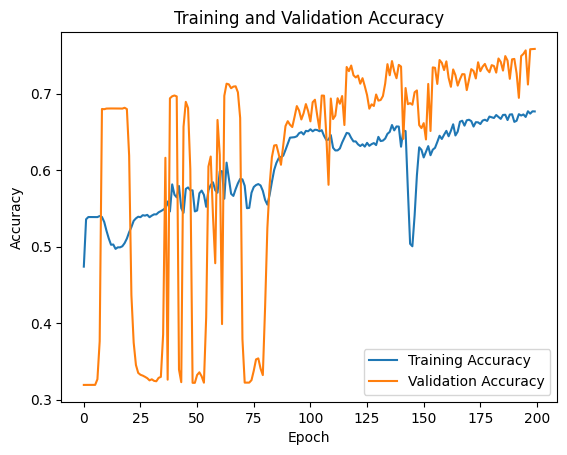

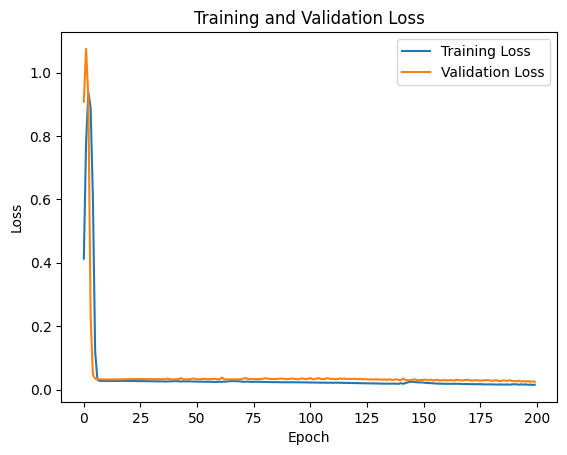

In [112]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing the History object

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Models
model
- accuracy: 0.7866 - val_accuracy: 0.7758

model1
- accuracy: 0.8432  - val_accuracy: 0.6941

model3

- accuracy: 0.8210 - val_loss: 0.0221 - val_accuracy: 0.6905



## Test result

Download test images

In [115]:
from PIL import Image
import requests
from io import BytesIO

url1 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/old-barn-in-black-and-white-randall-nyhof.jpg'


url2 = 'https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/horizontal-black-and-white-photograph-of-a-lake-michigan-sunset-randall-nyhof.jpg'

url3 = 'https://images.unsplash.com/photo-1614925861087-aa06270091b3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8OXx8YmxhY2slMjBhbmQlMjB3aGl0ZSUyMG5hdHVyZXxlbnwwfHwwfHw%3D&w=1000&q=80'

url4 = 'https://images.squarespace-cdn.com/content/538a3874e4b0ab1541d204ad/1490210210601-DDAMF95MFG8RQ7T1M56V/?content-type=image%2Fjpeg'

url_list = [url1,url2,url3,url4]

In [64]:
import matplotlib.pyplot as plt

Model 1 

1/1 [==============================] - 0s 84ms/step


ConnectionError: HTTPSConnectionPool(host='images.squarespace-cdn.com', port=443): Max retries exceeded with url: /content/538a3874e4b0ab1541d204ad/1490210210601-DDAMF95MFG8RQ7T1M56V/?content-type=image%2Fjpeg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D6E8810E90>: Failed to resolve 'images.squarespace-cdn.com' ([Errno 11001] getaddrinfo failed)"))

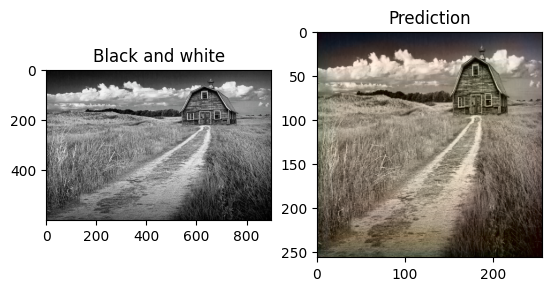

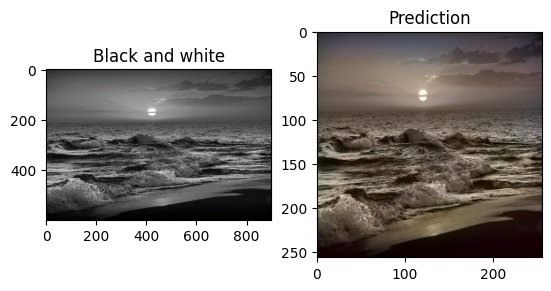

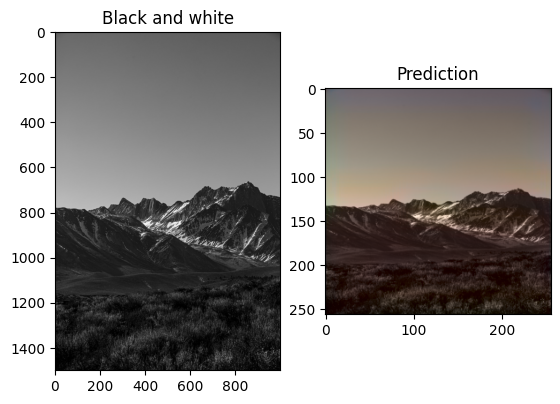

In [125]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

Model 2

In [108]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model1.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001D7075B6610>

Model 3

1/1 [==============================] - 0s 58ms/step


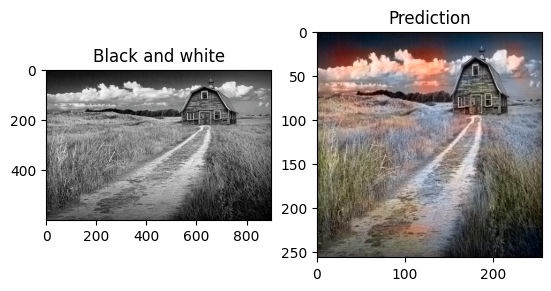

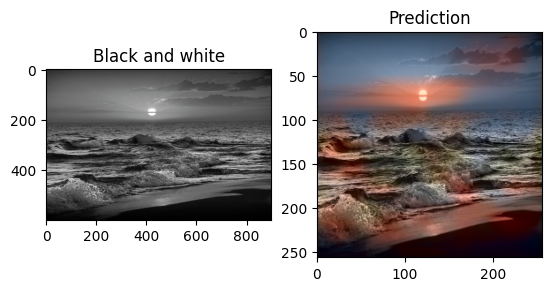

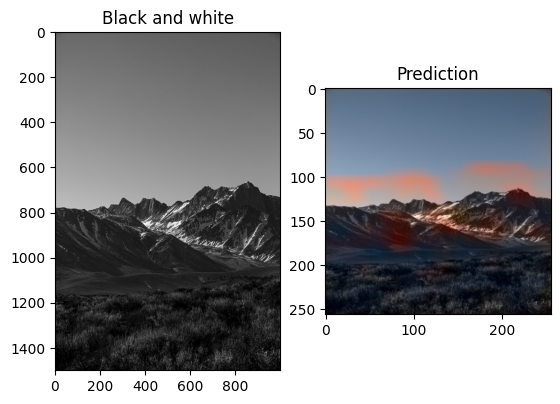

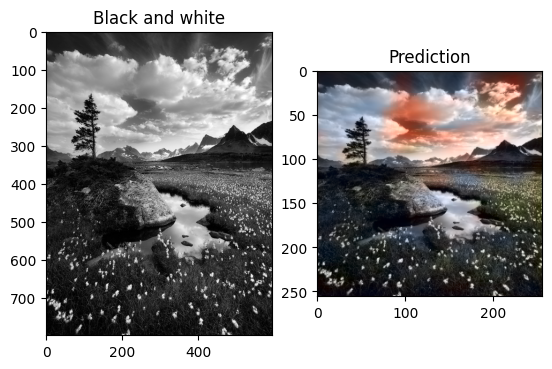

In [117]:
for i in range(0,4):
    response = requests.get(url_list[i])
    img = Image.open(BytesIO(response.content))
    img1_color=[]
    img1=img_to_array(img)
    img1 = resize(img1 ,(256,256))
    img1_color.append(img1)

    img1_color = np.array(img1_color, dtype=float)
    img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
    img1_color = img1_color.reshape(img1_color.shape+(1,))

    output1 = model3.predict(img1_color)
    output1 = output1*128

    result = np.zeros((256, 256, 3))
    result[:,:,0] = img1_color[0][:,:,0]
    result[:,:,1:] = output1[0]

    f, axarr = plt.subplots(1,2)
    axarr[0].title.set_text('Black and white')  
    axarr[1].title.set_text('Prediction')  
    axarr[0].imshow(img)
    axarr[1].imshow(lab2rgb(result))
    

### Save model

In [44]:
model1.save('image-colorization.h5')

C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load model

In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming Y_test contains the ground truth colorized images
# and predictions is the output from model.predict()

# Reshape Y_test and predictions to 2D arrays
Y_test_2d = Y.reshape(-1, Y.shape[-1])
predictions_2d = predictions.reshape(-1, predictions.shape[-1])

# Calculate mean squared error
mse = mean_squared_error(Y_test_2d, predictions_2d)
print(f'Mean Squared Error (MSE): {mse}')

print(f'Mean Squared Error (MSE): {mse}')

# Assuming you have a threshold to decide if a prediction is accurate
threshold = 0.1  # Adjust as needed
accurate_predictions = mse < threshold
accuracy = np.mean(accurate_predictions)
print(f'Accuracy: {accuracy}')


Mean Squared Error (MSE): 0.026045873761177063
Mean Squared Error (MSE): 0.026045873761177063
Accuracy: 1.0


In [1]:

response = requests.get(url_list[i])
img = Image.open(BytesIO(response.content))
img1_color=[]
img1=img_to_array(img)
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model3.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]

f, axarr = plt.subplots(1,2)
axarr[0].title.set_text('Black and white')  
axarr[1].title.set_text('Prediction')  
axarr[0].imshow(img)
axarr[1].imshow(lab2rgb(result))
    

NameError: name 'Image' is not defined

In [ ]:
# https://onedrive.live.com/?cid=CF3E1367FDEA1E70&id=cf3e1367fdea1e70%2137010&parId=cf3e1367fdea1e70%2128357&o=OneUp

1/1 [==============================] - 0s 86ms/step


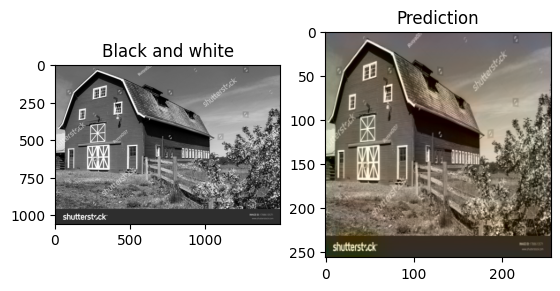

In [124]:
# Assuming you have the local image path
local_image_path = "1.stock-photo-farm-barn-house-in-garden-scene-1788613571-modified.jpg"

# Load the image from the local path
img = Image.open(local_image_path)

img1_color = []
img1 = img_to_array(img)
img1 = resize(img1, (256, 256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0 / 255 * img1_color)[:, :, :, 0]
img1_color = img1_color.reshape(img1_color.shape + (1,))

# Assuming model3 is already loaded and compiled
output1 = model.predict(img1_color)
output1 = output1 * 128

result = np.zeros((256, 256, 3))
result[:, :, 0] = img1_color[0][:, :, 0]
result[:, :, 1:] = output1[0]

f, axarr = plt.subplots(1, 2)
axarr[0].set_title('Black and white')
axarr[1].set_title('Prediction')
axarr[0].imshow(img)
axarr[1].imshow(lab2rgb(result))

plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming you have already defined your model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

# Create an instance of History callback
history = model.fit(X, Y, epochs=10, validation_data=(X, Y))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Assuming 'accuracy' and 'val_accuracy' are the correct metric names
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, UpSampling2D
from tensorflow.keras.utils import plot_model

# Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Decoder
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

Plot the model architecture
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming you have already defined your model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

# Create an instance of History callback
history = model.fit(X, Y, epochs=10, validation_data=(X, Y))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Assuming 'accuracy' and 'val_accuracy' are the correct metric names
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, UpSampling2D
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data X_train (input images) and Y_train (target images)
# Replace X_train and Y_train with your actual data

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
Y_train = Y_train.astype('float32') / 255.0

# # Encoder
# model3 = Sequential()
# model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
# model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
# model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# # Decoder
# model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model3.add(Dropout(0.3))
# model3.add(UpSampling2D((2, 2)))
# model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model3.add(Dropout(0.3))
# model3.add(UpSampling2D((2, 2)))
# model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
# model3.add(UpSampling2D((2, 2)))

# Plot the model architecture
plot_model(model3, to_file='1.stock-photo-farm-barn-house-in-garden-scene-1788613571-modified.jpg', show_shapes=True, show_layer_names=True)

# Compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model3.fit(X_train, Y_train, epochs=10, validation_data=(X_train, Y_train))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


NameError: name 'X_train' is not defined

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, UpSampling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Load your downloaded images
input_image_path = "1.stock-photo-farm-barn-house-in-garden-scene-1788613571-modified.jpg"
output_image_path = "1.stock-photo-farm-barn-house-in-garden-scene-1788613571.jpg"

# Load and preprocess the images
input_image = img_to_array(load_img(input_image_path, target_size=(256, 256)))
output_image = img_to_array(load_img(output_image_path, target_size=(256, 256)))

# Normalize pixel values to be between 0 and 1
input_image = input_image.astype('float32') / 255.0
output_image = output_image.astype('float32') / 255.0

# Add a batch dimension
input_image = np.expand_dims(input_image, axis=0)
output_image = np.expand_dims(output_image, axis=0)

# # Encoder
# model3 = Sequential()
# model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 3)))
# model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
# model3.add(Dropout(0.3))
# model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
# model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# # Decoder
# model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model3.add(Dropout(0.3))
# model3.add(UpSampling2D((2, 2)))
# model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model3.add(Dropout(0.3))
# model3.add(UpSampling2D((2, 2)))
# model3.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
# model3.add(UpSampling2D((2, 2)))

# Plot the model architecture
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model3.fit(input_image, output_image, epochs=10, validation_data=(input_image, output_image))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10


ValueError: in user code:

    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_11' (type Sequential).
    
    Input 0 of layer "conv2d_58" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 256, 256, 3)
    
    Call arguments received by layer 'sequential_11' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
      • training=True
      • mask=None


In [87]:
from keras.layers import Dropout, UpSampling2D
from keras.models import Sequential
from keras.layers import Conv2D

model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Decoder
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))


# Plot the model architecture
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model3.fit(input_image, output_image, epochs=50, validation_data=(input_image, output_image))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/50


ValueError: in user code:

    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_16' (type Sequential).
    
    Input 0 of layer "conv2d_91" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 256, 256, 3)
    
    Call arguments received by layer 'sequential_16' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
      • training=True
      • mask=None


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, UpSampling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

# Assuming your model3 is defined as follows
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
# ... rest of your model architecture

# Load your downloaded image
local_image_path = "1.stock-photo-farm-barn-house-in-garden-scene-1788613571-modified.jpg"
img = Image.open(local_image_path)

img1_color = []
img1 = img_to_array(img)
img1 = resize(img1, (256, 256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0 / 255 * img1_color)[:, :, :, 0]
img1_color = img1_color.reshape(img1_color.shape + (1,))

# Assuming model3 is already loaded and compiled
output1 = model3.predict(img1_color)
output1 = output1 * 128

result = np.zeros((256, 256, 3))
result[:, :, 0] = img1_color[0][:, :, 0]
result[:, :, 1:] = output1[0]

f, axarr = plt.subplots(1, 2)
axarr[0].set_title('Black and white')
axarr[1].set_title('Prediction')
axarr[0].imshow(img, cmap='gray')  # Display grayscale image
axarr[1].imshow(lab2rgb(result))

plt.show()


1/1 [==============================] - 0s 85ms/step


ValueError: could not broadcast input array from shape (128,128,64) into shape (256,256,2)

FileNotFoundError: No such file: 'C:\Users\win10\OneDrive\Desktop\nndl project\path_to_output_image'

In [94]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, UpSampling2D
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Encoder
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Dropout(0.3))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Decoder
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Dropout(0.3))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model3.add(UpSampling2D((2, 2)))

# Plot the model architecture
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model with validation split
history = model3.fit(X, Y, validation_split=0.2, epochs=150, batch_size=32)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


ValueError: Training data contains 1 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.